In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])


# The Mean-Variance Frontier

* Below I reproduce the plot of constructed last chapter

* It shows the average **EXCESS** return and standard deviation for portfolios that vary the weight in the risk-free asset and also the weight between the US stock market and the international stock market


![MVfronties](../../assets/plots/MV1.jpg)

* Note the upper envelope that defines the "investment frontier", i.e., what is achiavable in terms of risk and returns

* If you are in this envelope, you know that in order to get less risk you will have to get less return

* There is no portfolio with a higher average return and the same volatility

* And no portfolio with the same expected return and lower volatility

* In volatility-expected return space all these "investment frontier" portfolio are in a straight line

* Meaning that they achieve exactly the same ratio or expected excess return per unit of volatility since a stragith line has constant slope

* So all these portfolios have exactly the same Sharpe ratio ($\frac{E[r_p-R_f]}{std(r_p-R_f)}$)

* This is also the maximum SR among all possible portfolios of the basis assets 

  *  (in this case only two: US and world portfolio)


> What do these "efficient" portfolios look like? Do they have the same weights? How do the weights in the assets vary?




**Mathematical derivaiton of the Mean-variance Frontier**

* These portfolios all can be thought as minimizing variance/volatility for a given desired expected return

* or maximizing expected returns for a given dislike of variance 

* Formally they are choosing their composition of their portfolio 

$$r_p(X)=X'R+(1-\sum_i^I X_i)r_f$$

* Which is a portfolio that invests in risky assets (vector of returns R) and the rest $(1-\sum_i^I X_i)$ at the risk-free rate.

* note that I use big R here to emphasize that this is a vector of asset returns, like ($[R^{AAPL},R^{TSLA},..]$), and little $r_f$ to emphasize this is just a scalar (like 1%)

* Note that $(1-\sum_i^I X_i)<0$. what is the interpretation of this number being negative? What is the interpreation of being positive?

* So given weights W, asset returns R and rf, the portfolio returns $r_p(X)$

$$
\begin{aligned}
maximize_{(X)} E[r_p(X)]- \gamma/2 Var(r_p(X))\\
\end{aligned}
$$


**Excess return representation**

It is much easier to do the math and see what is going on if we separate the excess returns and the return piece so we represent our portolio as

$$r_p(X)=X'R+(1-\sum_i^I X_i)r_f=X'R+r_f-(\sum_i^I X_i)r_f=X'(R-r_f)+r_f$$

$$r_p(X)=X'R^e+r_f$$

* where $R^e$  is the vector of excess returns
* It is KEY to note that all the risky assets are now zero cost portfolios
* so each risky asset is really a portfolio that is long the risky asset and short the risk-free rate
* this means that no matter the sum of the weights in X, the cost of this risky portfolio is zero
* so the way this works is that you get your dollar and invest in the risk-free rate and now decide "two things"
   - What your risky portfolio shoudl look like by choosing $X/\sum X$
   - How much of this dollar to allocate to the risk asset , by choosing $\sum X$ the total fraction invested in the risky assets
   - If  $\sum X>1$ then you are leveraging, i.e. borrowing money to invest more than you have in the risky assets, so you are shorting the risk-free asset
   - It $\sum X<1$ then you are leaving some money invested in the risk-free rate, so you are buying the risk free asset

**Solution**




* All you need is to take the derivative of the expression with respect to the risky portfolio weights $X$ :


$$E[R^e]- 2\gamma/2 Var(R^e)X$$

* and impose the "first order condition":
$$
\begin{aligned}
E[R^e]- \gamma Var(R^e)X^*=0
\end{aligned}
$$

* which simply means that if $X^*$ is really the weight that maximizes the expression, if you move it a little bit in any direction, the value of the expression shouldn't move much

* In fact, for a tiny move in either direction, the benefit should be zero either way

* Here is the intuition:

  * Lets consider that we want to find the x that maximizes: $4x-x^2$  

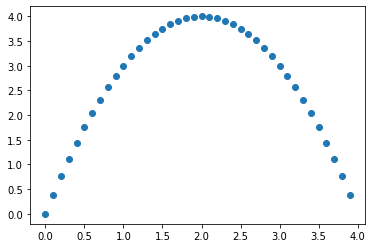

In [4]:
x=np.arange(0,4,0.1)
plt.scatter(x,4*x-x**2)

* This is maximized at 2

* The FOC for this case is simply

$$4-2x^*=0$$

* Which means $x^*=2$

* You see in the plot that pertubating x a little bit has not effect on the value

* close to the optimal, the expression is flat.

* This is a general result 

**The Tangecy  portfolio**



* Rewriting our first order condition we have


$
\begin{align}
\gamma Var(R^e)X^* &=E[R^e]\\
(\gamma Var(R^e))^{-1}\gamma Var(R^e)W^* &=(\gamma Var(R^e))^{-1}E[R^e]\\
W^* &=(\gamma Var(R^e))^{-1}E[R^e]\\
W^* &=\frac{1}{\gamma} Var(R^e)^{-1}E[R^e]
\end{align}$

* We simply m,ultiplied both the RHS and the LHS by the inverse of the matrix $\gamma Var(R^e)$ that was multiplying thw weight

* This is equvalent to solving 5x=4, by dividing though by 5 to get x=4/5


*Questions*

* How does your distaste for risk $\gamma$ impact your portfolio composition?

* Does it impact the relative weights in the risky assets?

* Note that $X^*$ is the optimal position in risky assets and therefore has the same dimension as the number of assets you are considering. 

* In our simple case 2 assets



_____

*Aside: Matrix inversion*

* You only need to understand how to operationaize it and in an conceptual level what it does

* But you don't need to really get the tiny details here. 

* If you are itnerested. Please see this below.

* If you need even more please see section 5.3

* Note that $(2)^{-1}=1/2=0.5$ (naturally!), $(Var(R^e))^{-1}$ is kind of like this, 

* but more complicated because $Var(R^e)$ is a N by N matrix and we can't simply divide over

* The definition of the inverse function is $f(x)=x^{-1}=y$ where $y*x=1$

* for matrixis it is the same: $(Var(R^e))^{-1}Var(R^e)=I$, but now instead of 1, we have an indentity matrix, which is a matrix with 1's in the diagonal and zero everywhere else

* For example, lets say we want to inverse a 2 by 2 matrix:

$$\left[\begin{array}{cc}3 & 7\\0 &9\end{array}\right]^{-1}=\left[\begin{array}{cc}a & b\\c &d\end{array}\right]$$


* We would simply solve


$$\left[\begin{array}{cc}3 & 7\\0 &9\end{array}\right]\left[\begin{array}{cc}a & b\\c &d\end{array}\right]=I=\left[\begin{array}{cc}1 & 0\\0 &1\end{array}\right]$$

* Which means solving this system of four equations below
$$
\begin{aligned}
3*a+7*c=1\\
3*b+7*d=0\\
0*a+9*c=0\\
0*b+9*d=1\\
\end{aligned}$$

* which in this case has an easy solution [a,b,c,d]=[1/3,-7/27,0,1/9]

* But we should be thankful for being born after the 70's, when people had to do these inversions by hand--for very large matrixes

* Now we can simply us the linear algebra library build in numpy  we discussed in Notebook 1 and invert the matrix


In [5]:
a=np.array([[3,7],[0,9]])
print(a)
np.linalg.inv(a) 

[[3 7]
 [0 9]]


array([[ 0.33333333, -0.25925926],
       [ 0.        ,  0.11111111]])

In [6]:
np.linalg.inv(a)  @ a

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [7]:
a.T

array([[3, 0],
       [7, 9]])

**Finding the Tangency portfolio**


First lets construct our vector of excess returns for our risky two assets US equity market and International equity market

In [10]:
Re=(Data[['RF','MKT','WorldxUSA']]).subtract(Data['RF'],axis='index').drop('RF',axis=1)
Re.head()

,MKT,WorldxUSA
Date,,
1963-02-28,-0.0238,-0.005073
1963-03-31,0.0308,-0.001929
1963-04-30,0.0451,-0.005836
1963-05-31,0.0176,-0.002586
1963-06-30,-0.0200,-0.013460


We start by estimating the covariance matrix from our data $Var(R^e)$

In [11]:
Re.cov()

,MKT,WorldxUSA
MKT,0.001948,0.001264
WorldxUSA,0.001264,0.002182


We then estiamte the expected excess return, the premium you expect to earn by investing in each asset $E[R^e]$

In [12]:
Re.mean()

MKT          0.005140
WorldxUSA    0.004149
dtype: float64

We then invert the covaraicne matrix $Var(R^e)^{-1}$

In [16]:
np.linalg.inv(Re.cov()) 

array([[ 822.50792137, -476.49212708],
       [-476.49212708,  734.40580739]])

we then use the dot product to cross-mulitply our vector of expected excess returns by the inverse of the covariance matrix

$$Var(R^e)^{-1}E[R^e]$$

In [17]:
W=np.linalg.inv(Re.cov()) @ Re.mean()
W

array([2.25099751, 0.597729  ])

Now for a given level of risk-aversion $gamma$ we can find the optimal risky portfolio 

In [21]:
gamma=4

Wstar=W/gamma
Wstar

array([0.56274938, 0.14943225])

and the amount allocated to the risk-free asset

In [22]:
1-np.sum(Wstar)

0.2878183714834085

**But what is your risk-aversion?**

That is a hard question to answer!

A more productive way to think about this choice is in terms of the level of volatiltiy that you are confortable with. 

You can bascially choose a gamma that implmenets your desired volatility

$$Var((W^*)'R^e)=Var(\frac{1}{\gamma}E[R^e]'Var(R^e)^{-1}R^e)$$


We first pull the $1/\gamma$ out. Recall that $Var(nx)=n^2Var(x)$

$$Var((W^*)'R^e)=\frac{1}{\gamma^2}Var(E[R^e]'Var(R^e)^{-1}R^e)$$

We now simply pull the vector $E[R^e]'Var(R^e)^{-1}$ out which because it is a vector the math is a bit different.In this case if the random variable X is a vector being multiplied by another vector W, then $Var(WX)=WVar(X)W^T$. Apply thin here we get

$$Var((W^*)'R^e)=\frac{1}{\gamma^2}E[R^e]'Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]$$

Using that $Var(R^e)^{-1}Var(R^e)=I$, i.e. the indentiy matrix, we get

$Var((W^*)'R^e)=\frac{1}{\gamma^2}E[R^e]'Var(R^e)^{-1}E[R^e]$

We can now solve for the desired level, say you want you portfolio to be mean-variance efficient and have volatility (meaning standard deviaiton) equal to a target $\sigma^{D}$, D for desired.

$\sigma^D=\sqrt{Var((W^*)'R^e)}=\frac{1}{\gamma}\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$

where above we took the square root to go from variance to standard deviation. We can now solve for $\gamma$

$$\gamma(\sigma^D)=\frac{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}{\sigma^D}$$

Thus the optimal weights are 

$$W^*(\sigma^D)'=\frac{\sigma^D}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}E[R^e]'Var(R^e)^{-1}$$

the intuition here is simple. $\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$ is the volatility of the optimal portfolio with risk-aversion 1 ,$E[R^e]'Var(R^e)^{-1}$. You simply scale up the weights up and down to hit your desired volatility level

The important point is that $\frac{\sigma^D}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}$ is a scalar, so you are increasing/decreasing expsorue in the risky asset proportionally.

Your position in the risk-free asset can be simply solved for 


$$1-1'W^*(\sigma^D)=1- \frac{\sigma^D}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}1'Var(R^e)^{-1}E[R^e]$$


So the more volatility you want, the less you invest in the risk-free asset and the more you invest in the risky assets.



**Two-fund separation**

* This above is a classic result in finance.

* It tells us that the decision of which assets to invest is completely independent of your risk-aversion

* Your risky portfolio is always the same, and you risk-aversion simply determines how much of it you will have, versus the risk-free rate

* Please take a moment to appreciate this because understading this result

* Why that happens?

Because any portfolio that is proportional to $Var(R^e)^{-1}E[R^e]$ achieve the highest feasible Sharpe Ratio

* Why is that?

Recall what a SR is : $E[r-r_f]/\sigma(r-r_f)$. Since this portfolio solves the problem of maximizing expected return for a given level of volatility, it also is the portfolio with maximum Sharpe Ratio

Note further that any linear compibration fo this portfolio with the risk-free rate will achieve exactly the same sharpe ratio. 

Let $r_p=r_f+wr^*$ then $E[r_p-r_f]/\sigma(r_p-r_f)=E[wr^*]/\sigma(wr^*)=E[r^*]/\sigma(r^*)$


Which happens becasue the risk-free rate has zero volatiltiy.


**Properties of the Tangency Portfolio**

Any portfolio that is proportional to  $Var(R^e)^{-1}E[R^e]$ is in the **Tangency** of the mean-variance frontier

I will refer to $W_T=Var(R^e)^{-1}E[R^e]$ as the tangency portfolio, but formally anyy other portfolio that is of the form $x W_T$ where x is a scalar is also tangency.

1. What is the expected excess return of the tangency portfolio?

$$E[W_T'R^e]=E[E[R^e]'Var(R^e)^{-1}R^e]=E[R^e]'Var(R^e)^{-1}E[R^e]$$

2. What is the volatility of the tangency portfolio?

$$Var[W_T'R^e]=Var(E[R^e]'Var(R^e)^{-1}R^e)=E[R^e]'Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]$$

$$Var[W_T'R^e]=E[R^e]'Var(R^e)^{-1}E[R^e]$$

$$STD[W_T'R^e]=\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$$

3. What is the Sharpe Ratio of the Tangency portfolio?

$$\frac{E[W_T'R^e]}{STD[W_T'R^e]}=\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$$

As we saw before, the Sharpe Ratio is invariant to the precise location that you choose in the investment frontier. Of course volatiity and Expected excess return will vary, but any leverage effect will exactyl cancel out when you look at the Sharpe Ratio

So Sharpe Ratio is nice becasuse it is invariant to leverage

**Portfolio advice summary (so far!)**

* All investors invest in the same portfolio of risky assets, regardless of risk aversion.

* Depending on risk aversion (desired level of volatility) , they choose an appropriate mix of risk-free and risky fund investments

__________________
*Reality is a bit more complicated*

- Here we assume your preferences: You like higher portfolio expected returns and dislikes portfolio variance

- Peoples preferences for risk are likely to be much richer than these simple preferences

- We will discuss later how to incorporate other risk dimensions (tail risks, background risks, etc)

- We also ignore investment horizon effects which we will discuss later in the course
